# CS 178: HW 1 - Angel Vilchis

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Setting seed
np.random.seed(0)

## Problem 1: Python & Data Exploration

In [3]:
# Loading Data
iris = np.genfromtxt("data/iris.txt", delimiter=None)
Y = iris[:,-1] # Get all rows in last column
X = iris[:,0:-1] # For all rows get all columns from 0 to last

In [4]:
# Shape, 148 data points with 5 features each
print(X.shape)

(148, 4)


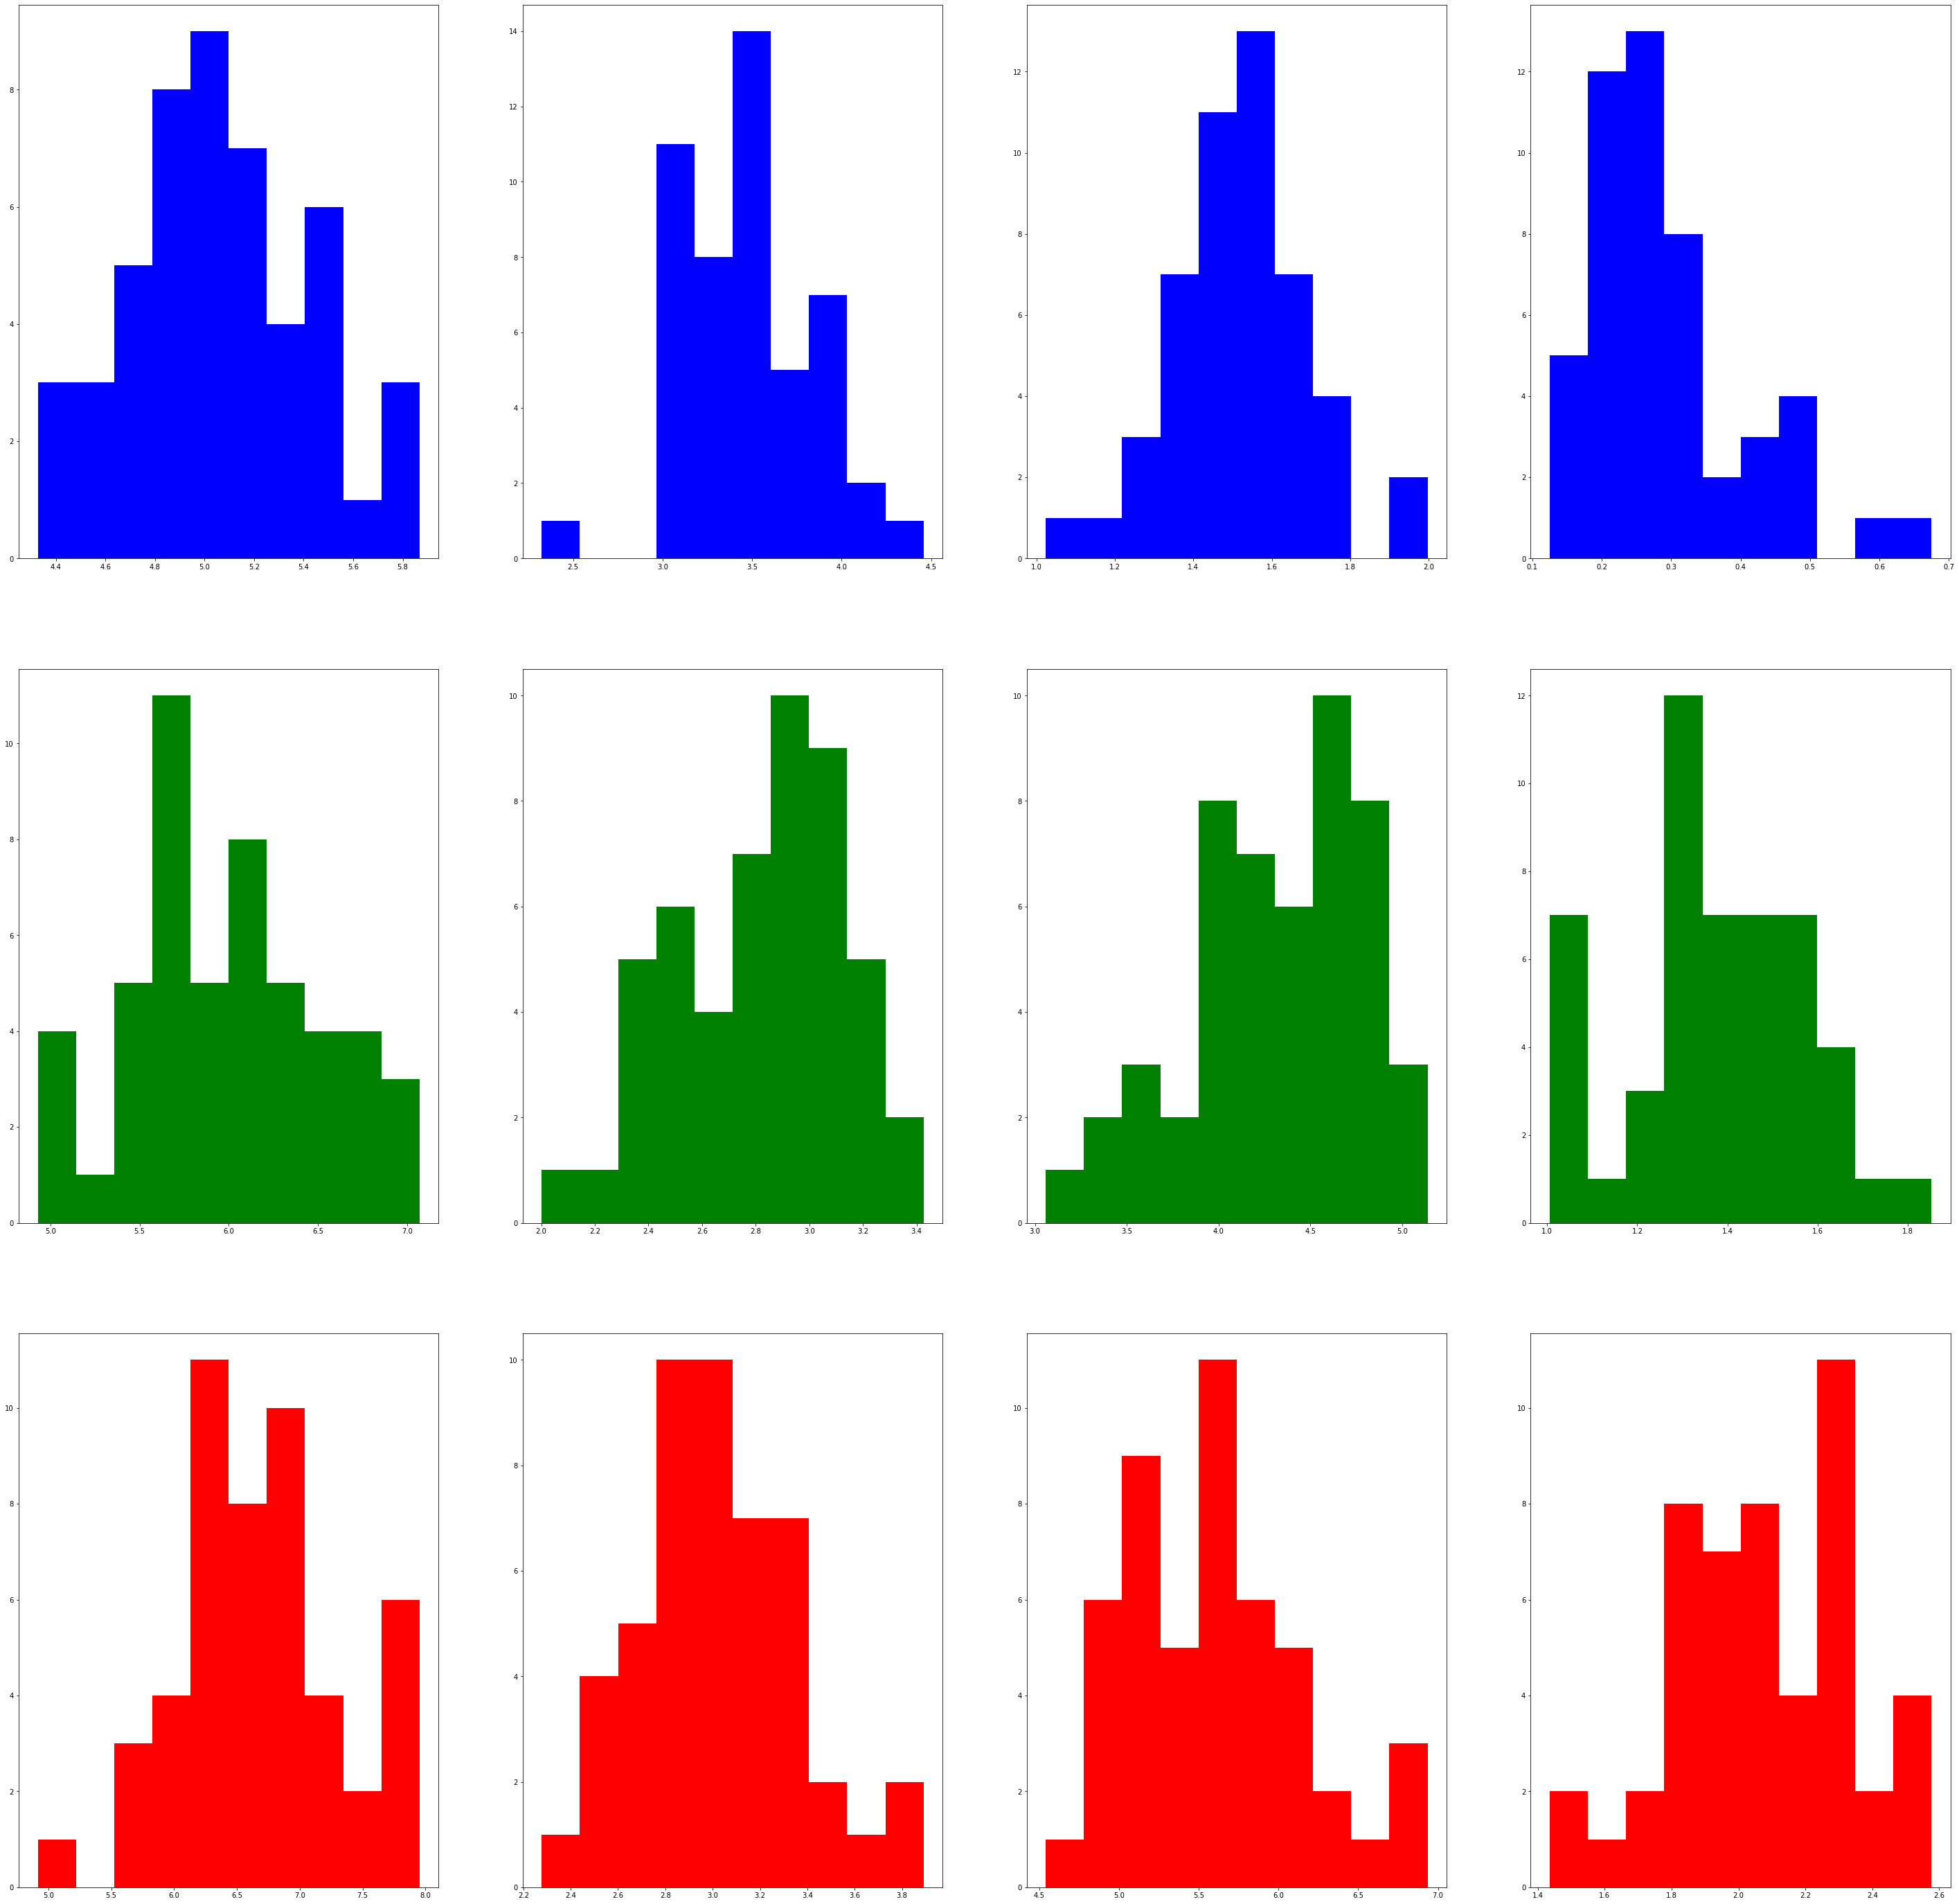

In [5]:
# Histograms, features as col, class as row
fig, axs = plt.subplots(3, 4, figsize=(50, 50))
colors = ['b', 'g', 'r']
for feature_index in range(X.shape[1]):
    for group_num, group in enumerate(np.unique(Y)):
        axs[group_num][feature_index].hist(X[Y==group, feature_index], color=colors[group_num])

In [6]:
# Mean, variance, standard deviation of features
print(f"Means: {np.mean(X, axis=0)}")
print(f"Variances: {np.var(X, axis=0)}")
print(f"Standard Deviations: {np.std(X, axis=0)}")

Means: [5.90010376 3.09893092 3.81955484 1.25255548]
Variances: [0.694559   0.19035057 3.07671634 0.57573564]
Standard Deviations: [0.83340207 0.43629184 1.75405711 0.75877246]


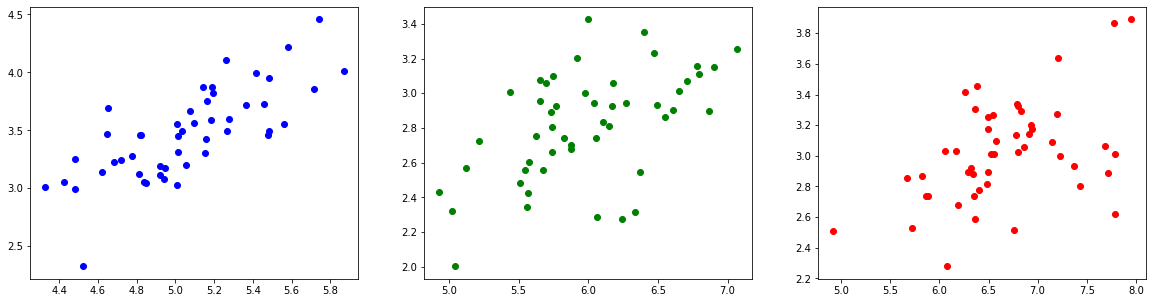

In [7]:
# Second feature versus first feature, by class
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
for group_num, group in enumerate(np.unique(Y)):
    axs[group_num].scatter(X[Y==group, 0], X[Y==group, 1], color=colors[group_num])

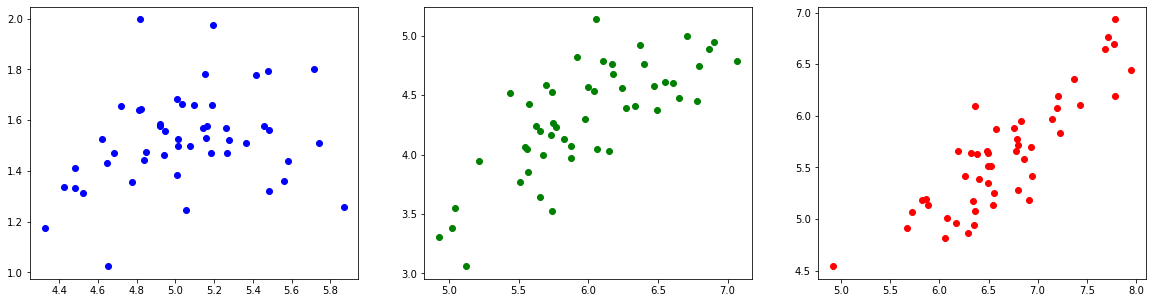

In [8]:
# Third feature versus first feature, by class
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
for group_num, group in enumerate(np.unique(Y)):
    axs[group_num].scatter(X[Y==group, 0], X[Y==group, 2], color=colors[group_num])

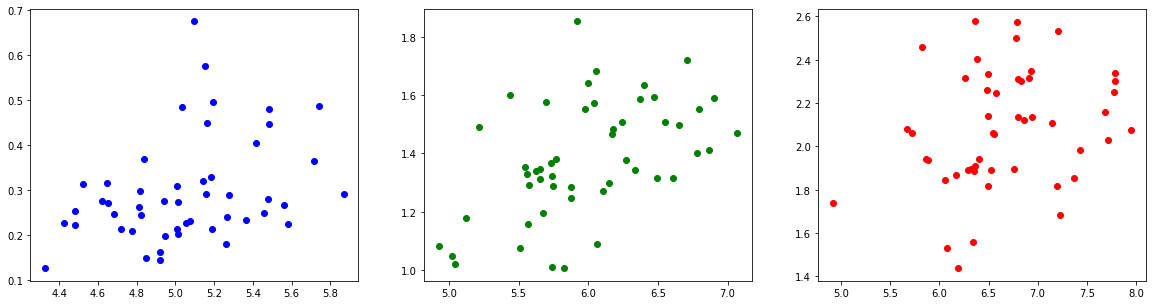

In [9]:
# Fourth feature versus first feature, by class
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
for group_num, group in enumerate(np.unique(Y)):
    axs[group_num].scatter(X[Y==group, 0], X[Y==group, 3], color=colors[group_num])

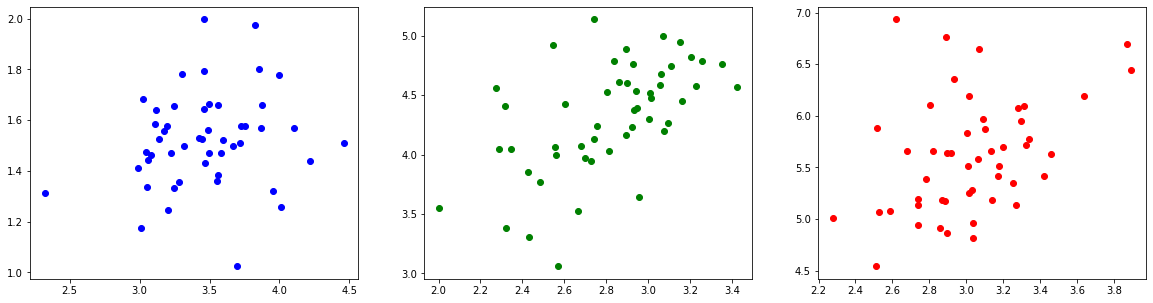

In [10]:
# Third feauture versus second feature, by class
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
for group_num, group in enumerate(np.unique(Y)):
    axs[group_num].scatter(X[Y==group, 1], X[Y==group, 2], color=colors[group_num])

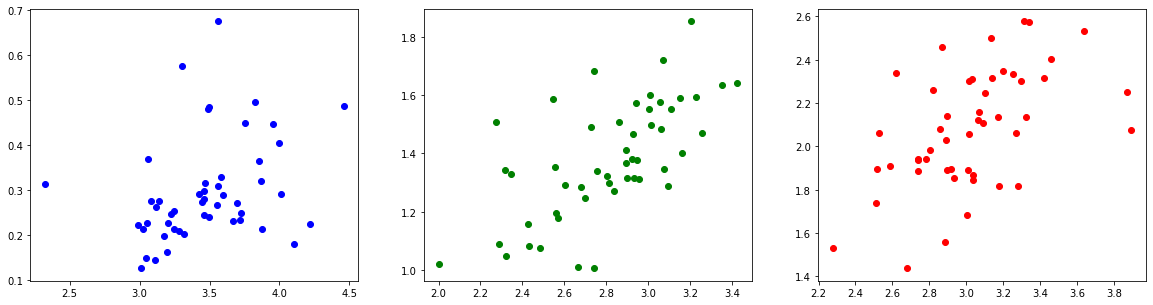

In [11]:
# Fourth feature versus second feature, by class
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
for group_num, group in enumerate(np.unique(Y)):
    axs[group_num].scatter(X[Y==group, 1], X[Y==group, 3], color=colors[group_num])

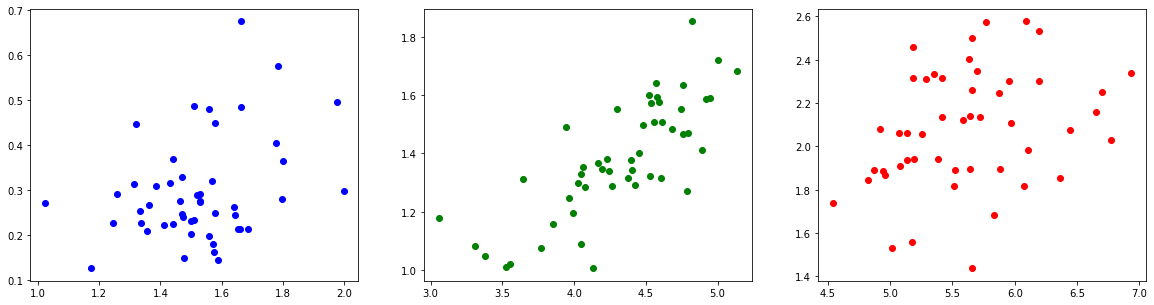

In [12]:
# Fourth feature versus third feature, by class
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
for group_num, group in enumerate(np.unique(Y)):
    axs[group_num].scatter(X[Y==group, 2], X[Y==group, 3], color=colors[group_num])

## Problem 2: Basic Linear Algebra

In [ ]:
# This is in code format because Jupyter converted to pdf does not keep newlines for RAW
1. A matrix has an inverse when its determinant is not 0 and it is square.

2. det(A) = 1(-1*2 - 3*1) - 2(2*2 - 1*1) + 3(2*3 - 1*-1)
          = 1(-5) - 2(3) + 3(7)
          = -5 - 6 + 21
          = 10
          
   det(B) = 0(-4*1 - 4*-2) - -8(1*1 - -2*-4) + -2(1*4 - -4*-4)
          = 8(-7) - 2(-12)
          = -56 + 24 
          = -32
          
3. A =                     A^-1 =
        1   2   3                   1/det(A) * det -1 1  det 2 1  det 2 -1
        2  -1   1                                   3 2      1 2      1  3
        1   3   2                             
                                               det  2 3  det 1 3  det 1 2
                                                    3 2      1 2      1 3
                                               
                                               det  2 3  det 1 3  det 1  2
                                                   -1 1      2 1      2 -1

A^-1 = 
        1/10 * -5   3   7
               -5   1   1
                5  -5  -5
     =
        -1/2  3/10  7/10
        -1/2  1/10  1/10
         1/2 -1/2   -1/2
         
B =                     B^-1 =
        0   -8   -2                 1/det(B) * det -4 -2  det 1 -2  det 1 -4
        1   -4   -2                                 4  1     -4  1     -4  4
       -4    4    1                             
                                               det  -8 -2  det 0 -2  det 0 -8
                                                    -4  1     -4  1     -4  4
                                               
                                               det  -8 -2  det 0 -2  det 0 -8
                                                    -4 -2     -4  1      1 -4

B^-1 = 
      -1/32 *  4  -7  -12
              -16  8  -32
               8  -8   8
     =
        -1/8  7/32  3/8
         1/2 -1/4    1
        -1/4  1/4  -1/4



4. (A^T)^-1 = (A^-1)^T

(A^-1)^T = 
        -1/2   -1/2  1/2
         3/10  1/10 -1/2
         7/10  1/10 -1/2

(B^-1)^T = 
        -1/8   1/2 -1/4
         7/32 -1/4  1/4
         3/8   1   -1/4



5. C^-1 = (AB)^-1 = (B^-1)(A^-1) =
                                    9/64  -13/64  -81/320
                                    3/8    -3/8    -7/40
                                   -1/8     3/40   -1/40

## Problem 3: kNN Predictions

In [13]:
# Import
import mltools as ml

In [14]:
# Loading data
iris = np.genfromtxt("data/iris.txt", delimiter=None)
Y = iris[:,-1]
X = iris[:,0:2]

In [15]:
# Shuffling data
X, Y = ml.shuffleData(X, Y)

In [16]:
# Splitting data, Train: 80%, Validation: 20%
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y, 0.8)

In [17]:
# Model and train
knn = ml.knn.knnClassify()
knn.train(Xtr, Ytr, 1)

In [18]:
# Predict Y on validation set
YvaHat = knn.predict(Xva)

C:\Users\Angel\Downloads\HW1\mltools\plot.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  axis.plot( X[Y==c,0],X[Y==c,1], 'ko', color=cmap(cvals[i]), **kwargs )
C:\Users\Angel\Downloads\HW1\mltools\plot.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  axis.plot( X[Y==c,0],X[Y==c,1], 'ko', color=cmap(cvals[i]), **kwargs )
C:\Users\Angel\Downloads\HW1\mltools\plot.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  axis.plot( X[Y==c,0],X[Y==c,1], 'ko', color=cmap(cvals[i]), **kwargs )


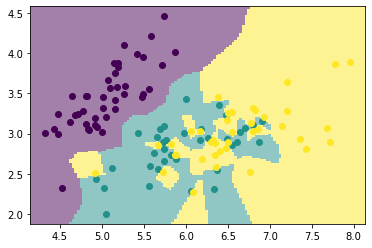

In [19]:
# Plot for 1 neighbors
ml.plotClassify2D(knn, Xtr, Ytr)

C:\Users\Angel\Downloads\HW1\mltools\plot.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  axis.plot( X[Y==c,0],X[Y==c,1], 'ko', color=cmap(cvals[i]), **kwargs )
C:\Users\Angel\Downloads\HW1\mltools\plot.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  axis.plot( X[Y==c,0],X[Y==c,1], 'ko', color=cmap(cvals[i]), **kwargs )
C:\Users\Angel\Downloads\HW1\mltools\plot.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  axis.plot( X[Y==c,0],X[Y==c,1], 'ko', color=cmap(cvals[i]), **kwargs )


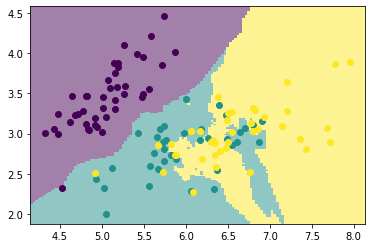

In [20]:
# Plot for 5 neighbors
knn.train(Xtr, Ytr, 5)
ml.plotClassify2D(knn, Xtr, Ytr)

C:\Users\Angel\Downloads\HW1\mltools\plot.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  axis.plot( X[Y==c,0],X[Y==c,1], 'ko', color=cmap(cvals[i]), **kwargs )
C:\Users\Angel\Downloads\HW1\mltools\plot.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  axis.plot( X[Y==c,0],X[Y==c,1], 'ko', color=cmap(cvals[i]), **kwargs )
C:\Users\Angel\Downloads\HW1\mltools\plot.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  axis.plot( X[Y==c,0],X[Y==c,1], 'ko', color=cmap(cvals[i]), **kwargs )


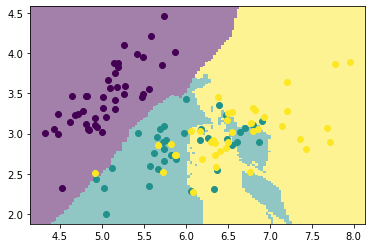

In [21]:
# Plot for 10 neighbors
knn.train(Xtr, Ytr, 10)
ml.plotClassify2D(knn, Xtr, Ytr)

C:\Users\Angel\Downloads\HW1\mltools\plot.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  axis.plot( X[Y==c,0],X[Y==c,1], 'ko', color=cmap(cvals[i]), **kwargs )
C:\Users\Angel\Downloads\HW1\mltools\plot.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  axis.plot( X[Y==c,0],X[Y==c,1], 'ko', color=cmap(cvals[i]), **kwargs )
C:\Users\Angel\Downloads\HW1\mltools\plot.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  axis.plot( X[Y==c,0],X[Y==c,1], 'ko', color=cmap(cvals[i]), **kwargs )


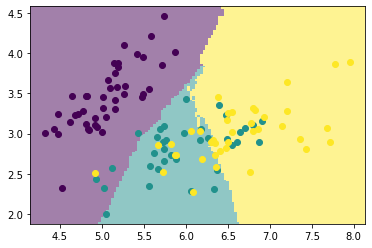

In [22]:
# Plot for 50 neighbors
knn.train(Xtr, Ytr, 50)
ml.plotClassify2D(knn, Xtr, Ytr)

1. Pros of increasing the k-value is that outliers will not overcomplicate the boundaries.
Cons of increasing the k-value is that many training data get misclassified. Most likely will not generalize well. 

In [23]:
# Getting training error and validation error on different k-values, 2 features
K = [1, 2, 5, 10, 50, 100, 200]
train_err = np.zeros(7)
val_err = np.zeros(7)
for i, k in enumerate(K):
    learner = ml.knn.knnClassify(Xtr, Ytr, k)
    
    Ytrhat = learner.predict(Xtr)
    train_err[i] = (Ytrhat != Ytr).sum() / len(Ytr)
    
    Yvahat = learner.predict(Xva)
    val_err[i] = (Yvahat != Yva).sum() / len(Yva)

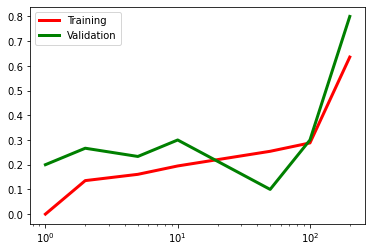

In [24]:
# Plotting training vs validation error on 2 features
plt.semilogx(K, train_err, 'r', lw=3, label="Training")
plt.semilogx(K, val_err, 'g', lw=3, label="Validation")
plt.legend()

I would recommend 50 out of the ones we checked. This is where validation error is still going down and training error has not risen much.

In [25]:
# Loading data
iris = np.genfromtxt("data/iris.txt", delimiter=None)
Y = iris[:,-1]
X = iris[:,0:-1]

In [26]:
# Splitting data, Train: 80%, Validation: 20%
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y, 0.8)

In [27]:
# Getting training and validation error on all features
K = [1, 2, 5, 10, 50, 100, 200]
train_err = np.zeros(7)
val_err = np.zeros(7)
for i, k in enumerate(K):
    learner = ml.knn.knnClassify(Xtr, Ytr, k)
    
    Ytrhat = learner.predict(Xtr)
    train_err[i] = (Ytrhat != Ytr).sum() / len(Ytr)
    
    Yvahat = learner.predict(Xva)
    val_err[i] = (Yvahat != Yva).sum() / len(Yva)

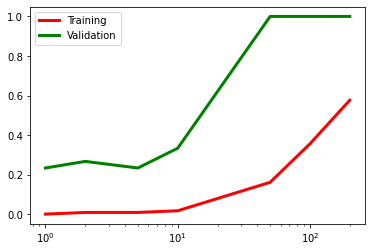

In [28]:
# Plotting training and validation error on different k-values, all features
plt.semilogx(K, train_err, 'r', lw=3, label="Training")
plt.semilogx(K, val_err, 'g', lw=3, label="Validation")
plt.legend()

The plots are very different, now I would recommend about 7 or anything less than 10 really. This is where both training error and validation error are at minimum.

## Problem 4: Conditional, Marginal, and Posterior Probabilities

In [ ]:
# This is in code format because Jupyter converted to pdf does not keep newlines for RAW
1.
p(y = -1) = 6/10 = 0.6
p(y = +1) = 4/10 = 0.4

p(x_1 = 0 | y = -1) = p(x_1 = 0 AND y = -1) / p(y = -1) = 3/10 * 10/6 = 1/2 = 0.5
p(x_1 = 1 | y = -1) = 1 - 0.5 = 0.5
p(x_1 = 0 | y = 1) = p(x_1 = 0 AND y = 1) / p(y = 1) = 1/10 * 10/4 = 1/4 = 0.25
p(x_1 = 1 | y = 1) = 1 - 0.25 = 0.75

p(x_2 = 0 | y = -1) = p(x_2 = 0 AND y = -1) / p(y = -1) = 1/10 * 10/6 = 1/6 = .1666
p(x_2 = 1 | y = -1) = 1 - .1666 = .8333
p(x_2 = 0 | y = 1) = p(x_2 = 0 AND y = 1) / p(y = 1) = 4/10 * 10/4 = 1 = 1
p(x_2 = 1 | y = 1) = 1 - 1 = 0

p(x_3 = 0 | y = -1) = p(x_3 = 0 AND y = -1) / p(y = -1) = 2/10 * 10/6 = 1/3 = .3333
p(x_3 = 1 | y = -1) = 1 - .3333 = .6666
p(x_3 = 0 | y = 1) = p(x_3 = 0 AND y = 1) / p(y = 1) = 1/10 * 10/4 = 1/4 = 0.25
p(x_3 = 1 | y = 1) = 1 - 0.25 = 0.75

p(x_4 = 0 | y = -1) = p(x_4 = 0 AND y = -1) / p(y = -1) = 1/10 * 10/6 = 1/6 = .1666
p(x_4 = 1 | y = -1) = 1 - .1666 = .8333
p(x_4 = 0 | y = 1) = p(x_4 = 0 AND y = 1) / p(y = 1) = 2/10 * 10/4 = 1/2 = 0.5
p(x_4 = 1 | y = 1) = 1 - 0.5 = 0.5

p(x_5 = 0 | y = -1) = p(x_5 = 0 AND y = -1) / p(y = -1) = 4/10 * 10/6 = 2/3 = .6666
p(x_5 = 1 | y = -1) = 1 - .6666 = .3333
p(x_5 = 0 | y = 1) = p(x_5 = 0 AND y = 1) / p(y = 1) = 3/10 * 10/4 = 3/4 = 0.75
p(x_5 = 1 | y = 1) = 1 - 0.75 = 0.25

2.
x = (0 0 1 1 0) 
p(x, y=+1) = (0.25 * 1 * 0.75 * 0.5 * 0.75) * 0.4 = 0.0281
p(x, y=-1) = (0.5 * .1666 * .6666 * .8333 * .6666) * 0.6 = 0.0185

p(x, y=+1) is higher for x = (0 0 1 1 0) 

x = (1 1 1 1 0)
p(x, y=+1) = (0.75 * 0 * a * b * c) * d = 0
p(x, y=-1) = (0.5 * .8333 * .6666 * .8333 * .6666) * 0.6 = 0.0926

p(x, y=-1) is higher for x = (1 1 1 1 0)

3.
x = (0 0 1 1 0) 
p(x) = p(x, y=+1) + p(x, y=-1)
     = 0.0281 + 0.0185 = 0.0466
p(y=+1, x) = [p(x | y=+1) * p(y=+1)] / p(x) = (0.0281 * 0.4) / 0.0466 = 0.2412

## Statement of Collaboration

I did not collaborate with any other individual. I only got help from the discussion week 1/2 notes: basics_mltools and basics_numpy files. 